# Uber New York Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

import plotly.express as px
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = r'/content/drive/MyDrive/Data for Uber'
files = ['uber-raw-data-aug14.csv',
         'uber-raw-data-apr14.csv',
         'uber-raw-data-jul14.csv',
         'uber-raw-data-jun14.csv',
         'uber-raw-data-may14.csv',
         'uber-raw-data-sep14.csv']
final = pd.DataFrame()

for file in files:
    df = pd.read_csv(path+"/"+file,encoding='utf-8')
    final = pd.concat([final,df])

In [4]:
final.shape

(4534327, 4)

The files are separated by month and each has the following columns:

*  Date/Time : The date and time of the Uber pickup

*  Lat : The latitude of the Uber pickup

*  Lon : The longitude of the Uber pickup

*  Base : The TLC base company code affiliated with the Uber pickup


*  The globe is split into an imaginary 360 sections from both top to bottom 

---

(north to south) and 180 sections from side to side (west to east). The 


sections running from top to bottom on a globe are called longitude, and the sections running from side to side on a globe are called latitude. Latitude is the measurement of distance north or south of the Equator. Every location on earth has a global address. Because the address is in numbers, people can communicate about location no matter what language they might speak. A global address is given as two numbers called coordinates. The two numbers are a location's latitude number and its longitude number ("Lat/Long").

In [5]:
df = final.copy()
df.head(10)

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
5,8/1/2014 0:13:00,40.7349,-74.0033,B02512
6,8/1/2014 0:15:00,40.7279,-73.9542,B02512
7,8/1/2014 0:17:00,40.7210,-73.9937,B02512
8,8/1/2014 0:19:00,40.7195,-74.0060,B02512
9,8/1/2014 0:20:00,40.7448,-73.9799,B02512


Let's check out data type

In [6]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

For the Date/Time collum the data type is object, so we should change the format into datetime using pd.to_datetime()

In [7]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M:%S')
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

Now, we were going to add a new collumn to define weekday, day, minute, month, and hour

In [8]:
df['weekday']=df['Date/Time'].dt.day_name()
df['day']=df['Date/Time'].dt.day
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,Friday,1,3,8,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,Friday,1,9,8,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,Friday,1,12,8,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,Friday,1,12,8,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,Friday,1,12,8,0


In [9]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

In [10]:
colors = ['lightslategray',] * 5
colors[0] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=df['weekday'].value_counts().index,
    y=df['weekday'].value_counts().values,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Rush Day of Uber Trip')

### Exploratory Data and Analysis

In [11]:
colors = ['lightslategray',] * 5
colors[0] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x = df['weekday'].value_counts().index,
    y = df['weekday'].value_counts(),
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='High Sales of Uber Trip')

Text(0.5, 0, 'work hour')

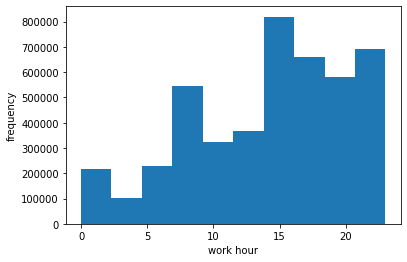

In [12]:
plt.hist(df['hour'])
plt.ylabel('frequency')
plt.xlabel('work hour')

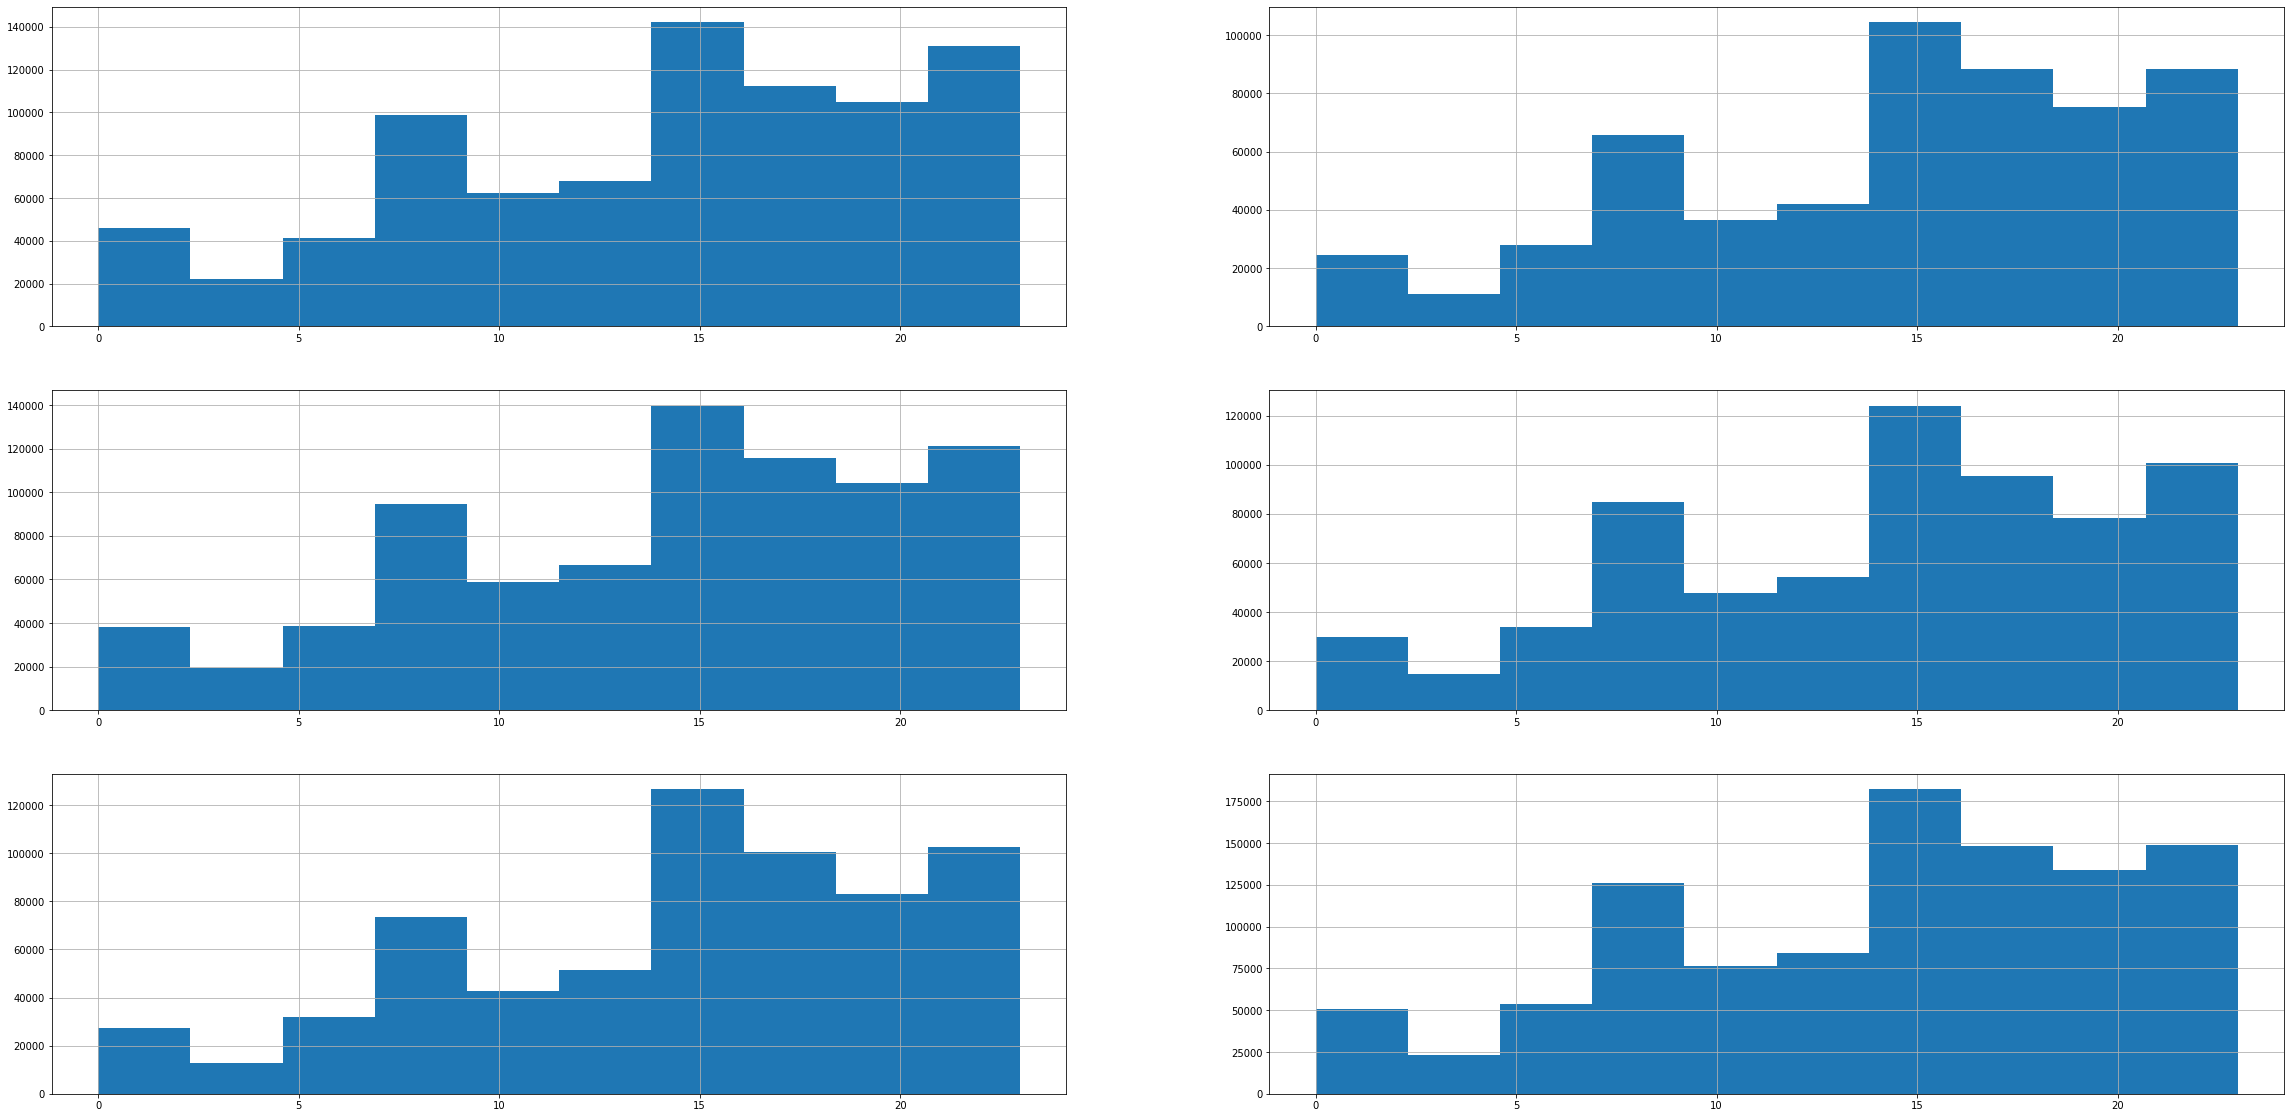

In [13]:
plt.figure(figsize=(40,20))
for i,month in enumerate(df['month'].unique()):
  plt.subplot(3,2,i+1)
  df[df['month']==month]['hour'].hist()

Analysing Monthly Rides

In [14]:
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [15]:
df.groupby('month')['hour'].count()

month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: hour, dtype: int64

In [16]:
fig = go.Figure(data=[go.Bar(
    x = df.groupby('month')['hour'].count().index,
    y = df.groupby('month')['hour'].count(),
    #marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='The Highest Monthly Ride')

Text(0.5, 1.0, 'Journeys by Month Day')

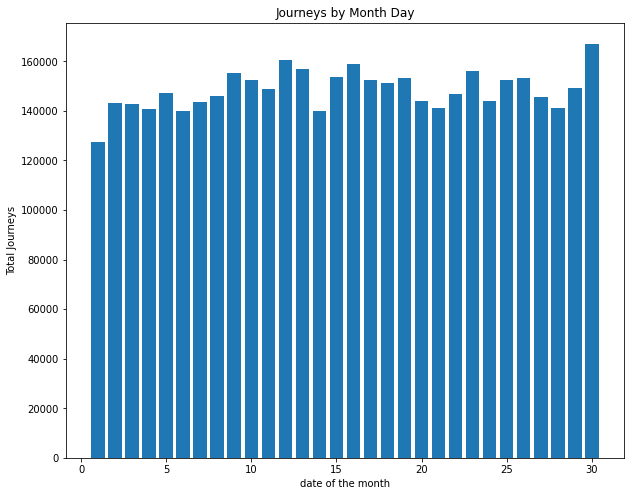

In [17]:
plt.figure(figsize=(10,8))
plt.hist(df['day'],bins=30,rwidth=0.8,range=(0.5,30.5))
plt.xlabel('date of the month')
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day')

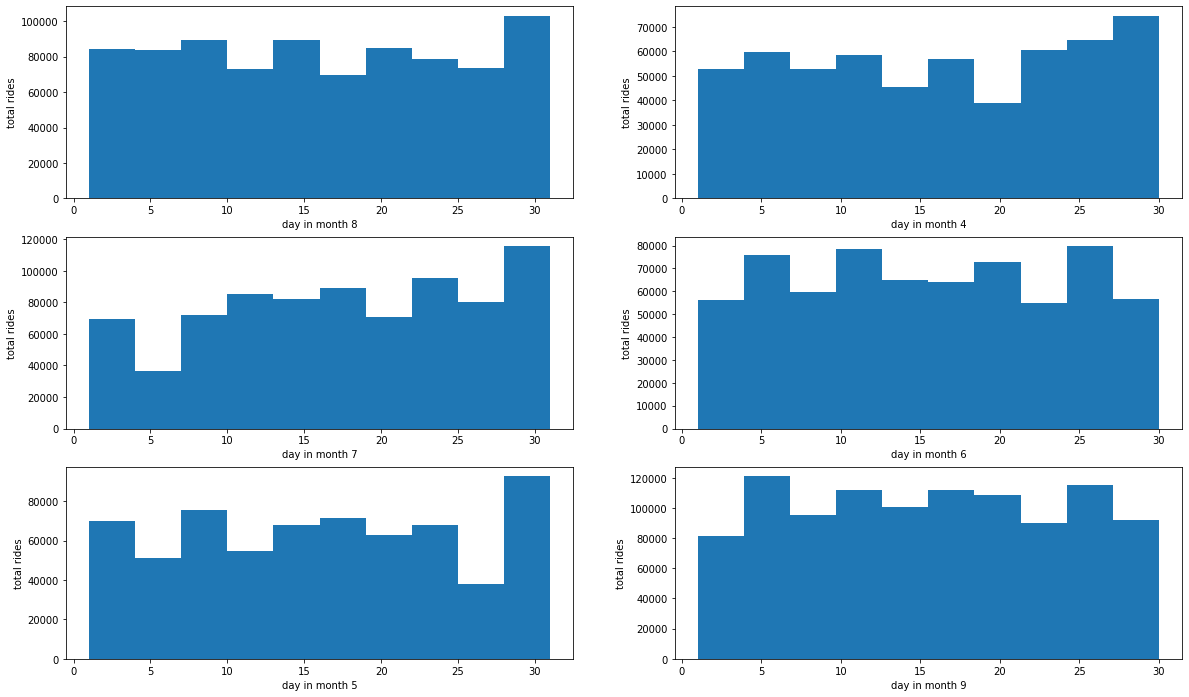

In [18]:
plt.figure(figsize=(20,12))
for i, month in enumerate(df['month'].unique(),1):
  plt.subplot(3,2,i)
  df_out=df[df['month']==month]
  plt.hist(df_out['day'])
  plt.xlabel('day in month {}'.format(month))
  plt.ylabel('total rides')

Analysing rush in hour

Text(0.5, 1.0, 'hoursoffday vs latitude of passenger')

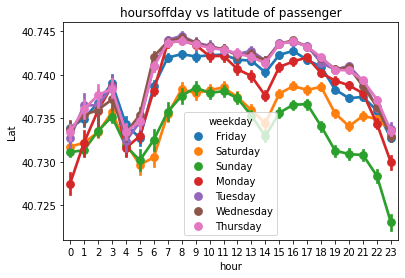

In [19]:
ax=sns.pointplot(x='hour',y='Lat', data=df, hue='weekday')
ax.set_title('hoursoffday vs latitude of passenger')

Performing Cross Analysis

In [20]:
base=df.groupby(['Base','month'])['Date/Time'].count().reset_index()
base

,Base,month,Date/Time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


Text(0.5, 1.0, 'Popular Base Number by Month')

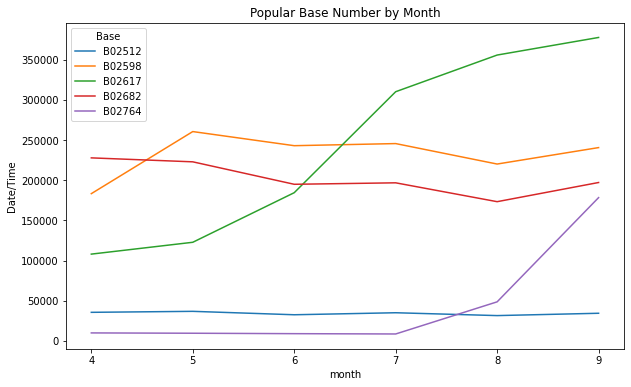

In [21]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='month',y='Date/Time', hue='Base',data=base)
ax.set_title('Popular Base Number by Month')

Perform Cross Analysis Through our exploration we are going to vizualize:


Heatmap by hour and weekday

Heatmap by hour and day

Heatmap by month and day

Heatmap by month and weekday

In [22]:
#Heatmap by hour and weekday
def count_rows(rows):
  return len(rows)
by_cross = df.groupby(['weekday','hour']).apply(count_rows)
by_cross

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

In [23]:
pivot=by_cross.unstack()
pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


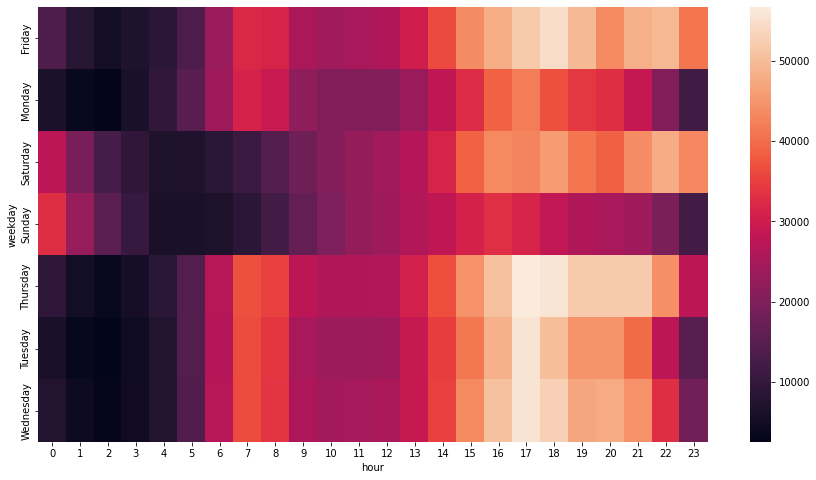

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(pivot)

In [25]:
#Heatmap by hour and day, month and day, month and weekday
def heatmap(col1, col2):
  by_cross = df.groupby([col1,col2]).apply(count_rows)
  pivot=by_cross.unstack()
  plt.figure(figsize=(15,8))
  return sns.heatmap(pivot)  

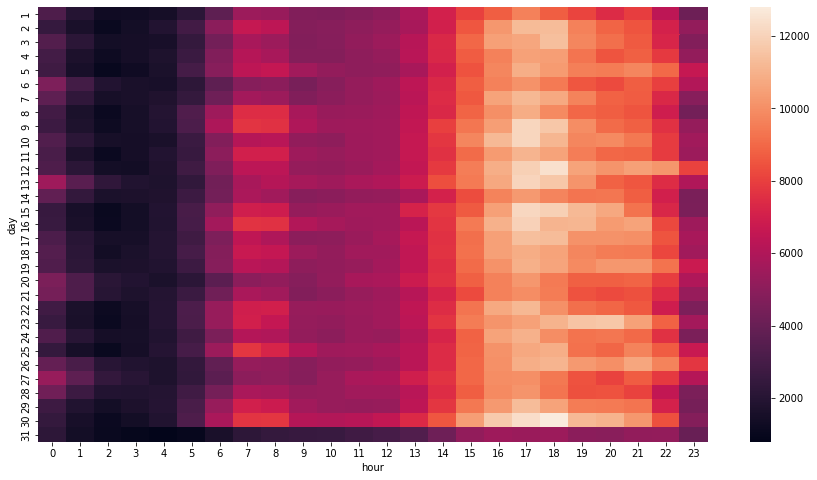

In [26]:
#Heatmap by hour and day
heatmap('day','hour')

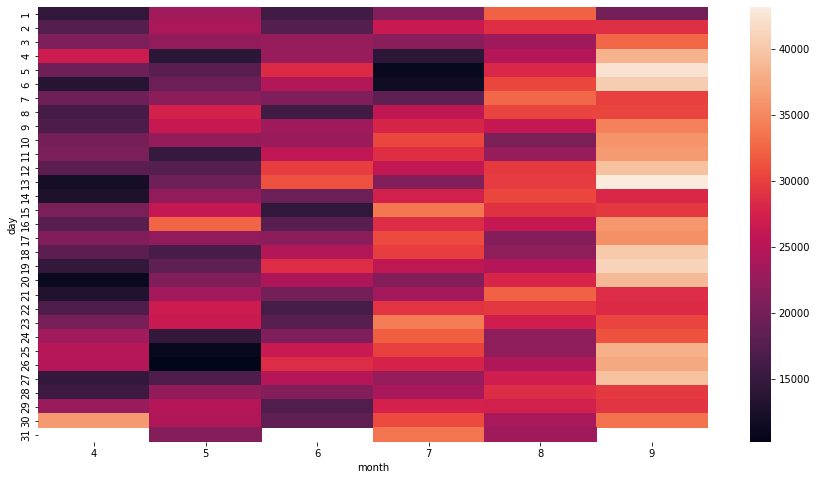

In [27]:
#Heatmap by month and day
heatmap('day','month')

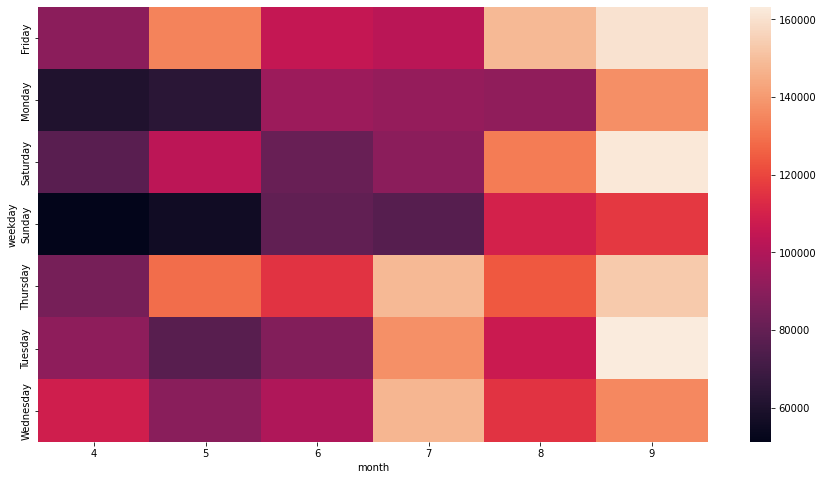

In [28]:
#Heatmap by month and weekday
heatmap('weekday', 'month')

Performs Spatial Anaysis on Demand of Uber

(40.6, 41.0)

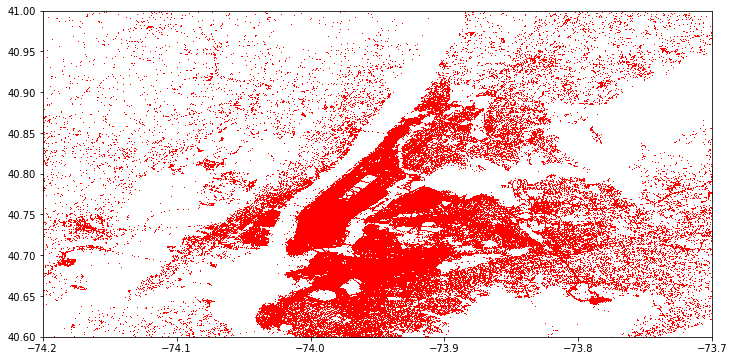

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df['Lon'],df['Lat'],'r+',ms=0.5)
plt.xlim(-74.2,-73.7)
plt.ylim(40.6,41)

In [30]:
df_out=df[df['weekday']=='Sunday']
df_out

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
2404,2014-08-03 00:03:00,40.7488,-74.0273,B02512,Sunday,3,3,8,0
2405,2014-08-03 00:04:00,40.7714,-73.9821,B02512,Sunday,3,4,8,0
2406,2014-08-03 00:06:00,40.7567,-73.9887,B02512,Sunday,3,6,8,0
2407,2014-08-03 00:07:00,40.7176,-73.9576,B02512,Sunday,3,7,8,0
2408,2014-08-03 00:08:00,40.7198,-73.9953,B02512,Sunday,3,8,8,0
...,...,...,...,...,...,...,...,...,...
1014138,2014-09-28 23:57:00,40.6447,-73.7821,B02764,Sunday,28,57,9,23
1014139,2014-09-28 23:57:00,40.7513,-73.9941,B02764,Sunday,28,57,9,23
1014140,2014-09-28 23:57:00,40.6875,-74.1824,B02764,Sunday,28,57,9,23
1014141,2014-09-28 23:57:00,40.6482,-73.7823,B02764,Sunday,28,57,9,23


In [31]:
rush=df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index()
rush.columns=['Lat','Lon','no of trips']
rush

,Lat,Lon,no of trips
0,39.9374,-74.0722,1
1,39.9378,-74.0721,1
2,39.9384,-74.0742,1
3,39.9385,-74.0734,1
4,39.9415,-74.0736,1
...,...,...,...
209225,41.3141,-74.1249,1
209226,41.3180,-74.1298,1
209227,41.3195,-73.6905,1
209228,41.3197,-73.6903,1


Analysing Uber Pickup on Each Month

In [32]:
uber_15=pd.read_csv(r'/content/drive/MyDrive/Data for Uber/uber-raw-data-janjune-15.csv')

In [33]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [34]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [35]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

In [36]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [37]:
uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['minute']=uber_15['Pickup_date'].dt.minute
uber_15['month']=uber_15['Pickup_date'].dt.month
uber_15['hour']=uber_15['Pickup_date'].dt.hour

In [38]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,weekday,day,minute,month,hour
0,B02617,2015-05-17 09:47:00,B02617,141,Sunday,17,47,5,9
1,B02617,2015-05-17 09:47:00,B02617,65,Sunday,17,47,5,9
2,B02617,2015-05-17 09:47:00,B02617,100,Sunday,17,47,5,9
3,B02617,2015-05-17 09:47:00,B02774,80,Sunday,17,47,5,9
4,B02617,2015-05-17 09:47:00,B02617,90,Sunday,17,47,5,9


In [39]:
px.bar(x=uber_15['month'].value_counts().index,
       y=uber_15['month'].value_counts())

Analysing Rush in New York City

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Rush in New York City')

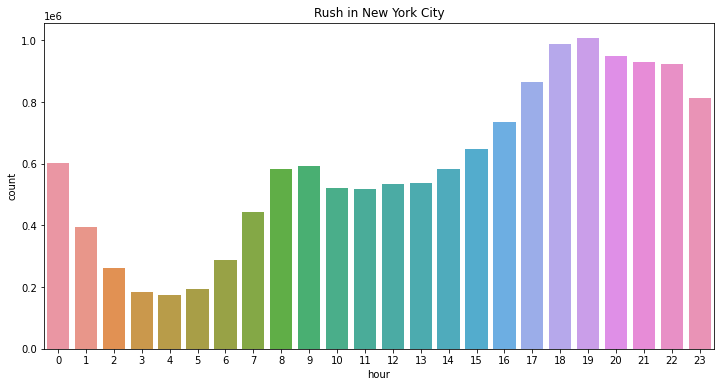

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(uber_15['hour'])
plt.title("Rush in New York City")

In [41]:
summary=uber_15.groupby(['weekday','hour'])['Pickup_date'].count().reset_index()
summary

,weekday,hour,Pickup_date
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575
...,...,...,...
163,Wednesday,19,143751
164,Wednesday,20,136003
165,Wednesday,21,133993
166,Wednesday,22,127026


In [42]:
summary.columns=['weekday','hour','count']
summary.head()

,weekday,hour,count
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575


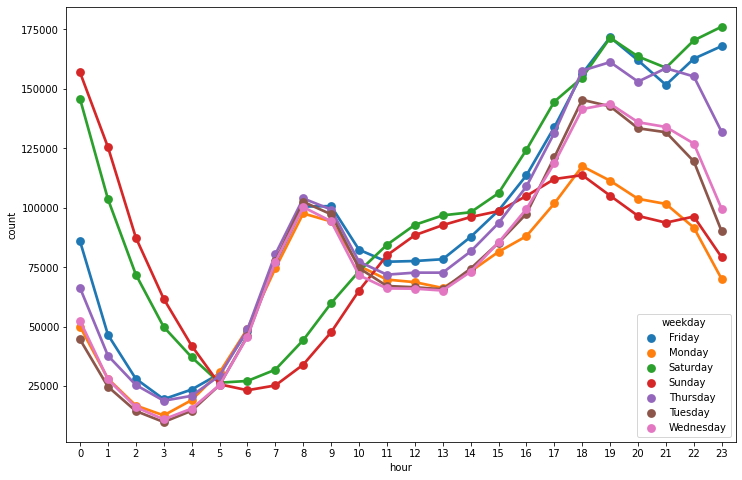

In [43]:
plt.figure(figsize=(12,8))
sns.pointplot(x='hour',y='count',hue='weekday',data=summary)

Perform in Depth Analysis of Uber Base Number

In [44]:
uber_foil=pd.read_csv(r'/content/drive/MyDrive/Data for Uber/Uber-Jan-Feb-FOIL.csv')

In [45]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [46]:
uber_foil.dtypes

dispatching_base_number    object
date                       object
active_vehicles             int64
trips                       int64
dtype: object

In [47]:
uber_foil['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

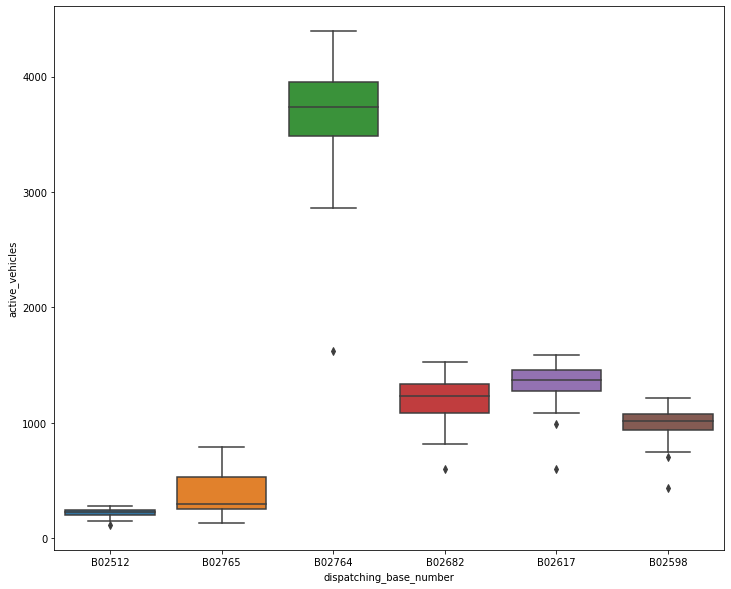

In [48]:
plt.figure(figsize=(12,10))
sns.boxplot(x='dispatching_base_number',y='active_vehicles', data=uber_foil)

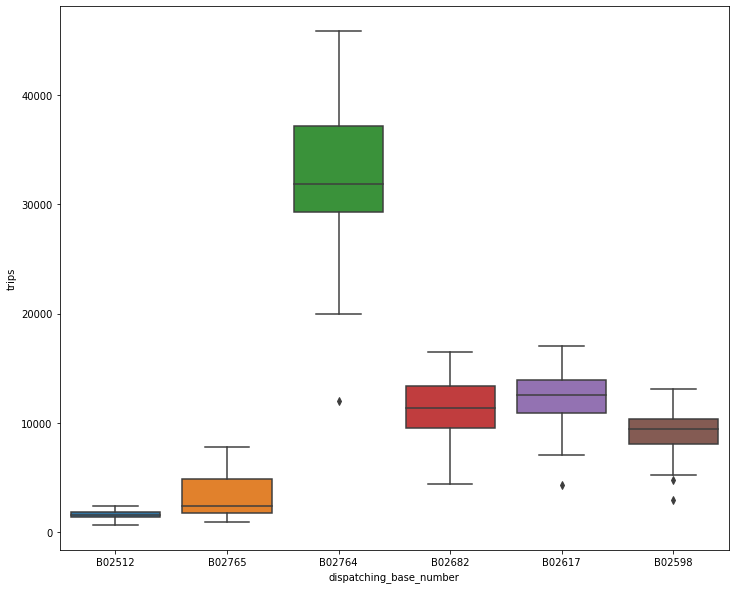

In [49]:
plt.figure(figsize=(12,10))
sns.boxplot(x='dispatching_base_number', y='trips', data=uber_foil)

In [50]:
#define trips.vehicle
uber_foil['trips/vehicle']=uber_foil['trips']/uber_foil['active_vehicles']

In [51]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips,trips/vehicle
0,B02512,1/1/2015,190,1132,5.957895
1,B02765,1/1/2015,225,1765,7.844444
2,B02764,1/1/2015,3427,29421,8.585060
3,B02682,1/1/2015,945,7679,8.125926
4,B02617,1/1/2015,1228,9537,7.766287


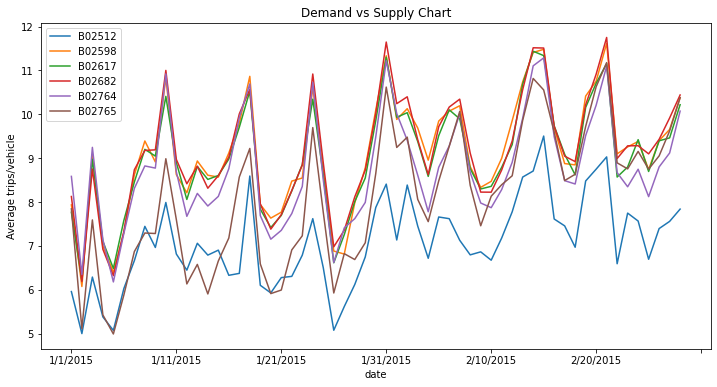

In [52]:
plt.figure(figsize=(12,6))
uber_foil.set_index('date').groupby(['dispatching_base_number'])['trips/vehicle'].plot()
plt.ylabel('Average trips/vehicle')
plt.title('Demand vs Supply Chart')
plt.legend()

# END OF THE SCRIPTS